# 🔥 Análisis de Inestabilidad: Nodo Inestable

## 🎯 Objetivo

Resolver analíticamente un sistema de EDOs lineales homogéneas donde los **autovalores son positivos** y visualizar el comportamiento resultante de **inestabilidad** en el Retrato de Fase.

## 📝 El Principio de Inestabilidad

La inestabilidad ocurre cuando al menos un autovalor ($\lambda$) de la matriz $\mathbf{A}$ es **positivo** ($\lambda > 0$). Si todos los autovalores son positivos, el punto de equilibrio $(\mathbf{0, 0})$ es un **Nodo Inestable**, y todas las soluciones tienden al infinito a medida que el tiempo ($t$) avanza, debido a que $e^{\lambda t} \to \infty$.

## Ejemplo de Inestabilidad

Resolveremos y graficaremos el sistema:
$$
\begin{cases} \mathbf{x'_1 = 2x_1 + x_2} \\ \mathbf{x'_2 = x_1 + 2x_2} \end{cases}
$$
La Matriz de Coeficientes es:
$$
\mathbf{A} = \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}
$$

In [1]:
# Importación de librerías para cálculo simbólico y álgebra lineal
import sympy as sp
from sympy import Function, symbols, Matrix, Eq

# Definición de la variable independiente (t) y símbolos
t = symbols('t')
lam = symbols('lambda')
C1, C2 = symbols('C1 C2')
x1 = Function('x1')(t)
x2 = Function('x2')(t)

# 1. Matriz del Sistema
A = Matrix([[2, 1], [1, 2]])

# 2. Ecuación Característica (det(A - λI) = 0)
ec_caracteristica = Eq(lam**2 - 4*lam + 3, 0)
autovalores = sp.solve(ec_caracteristica, lam)

lambda1 = autovalores[0] # λ₁ = 3
lambda2 = autovalores[1] # λ₂ = 1

print(f"Ecuación Característica: {ec_caracteristica}")
print(f"Autovalores obtenidos (λ₁, λ₂): {autovalores}")

# Observación: Ambos autovalores (3 y 1) son positivos, por lo que esperamos un Nodo Inestable.

Ecuación Característica: Eq(lambda**2 - 4*lambda + 3, 0)
Autovalores obtenidos (λ₁, λ₂): [1, 3]


## Paso 2: Cálculo de Autovectores y Solución General

### A. Autovector $\mathbf{v}_1$ para $\mathbf{\lambda_1 = 3}$
Se resuelve $(\mathbf{A} - 3\mathbf{I})\mathbf{v} = \mathbf{0}$, lo que lleva a la ecuación $-v_{1,1} + v_{1,2} = 0$.
$$
\mathbf{v}_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

### B. Autovector $\mathbf{v}_2$ para $\mathbf{\lambda_2 = 1}$
Se resuelve $(\mathbf{A} - 1\mathbf{I})\mathbf{v} = \mathbf{0}$, lo que lleva a la ecuación $v_{2,1} + v_{2,2} = 0$.
$$
\mathbf{v}_2 = \begin{pmatrix} -1 \\ 1 \end{pmatrix}
$$

### Solución General
La solución general es $\mathbf{X}(t) = C_1 \mathbf{v}_1 e^{\lambda_1 t} + C_2 \mathbf{v}_2 e^{\lambda_2 t}$:
$$
\mathbf{x_1(t) = C_1 e^{3t} - C_2 e^{t}}
$$
$$
\mathbf{x_2(t) = C_1 e^{3t} + C_2 e^{t}}
$$
Como ambos términos exponenciales crecen al infinito, el sistema es inestable.

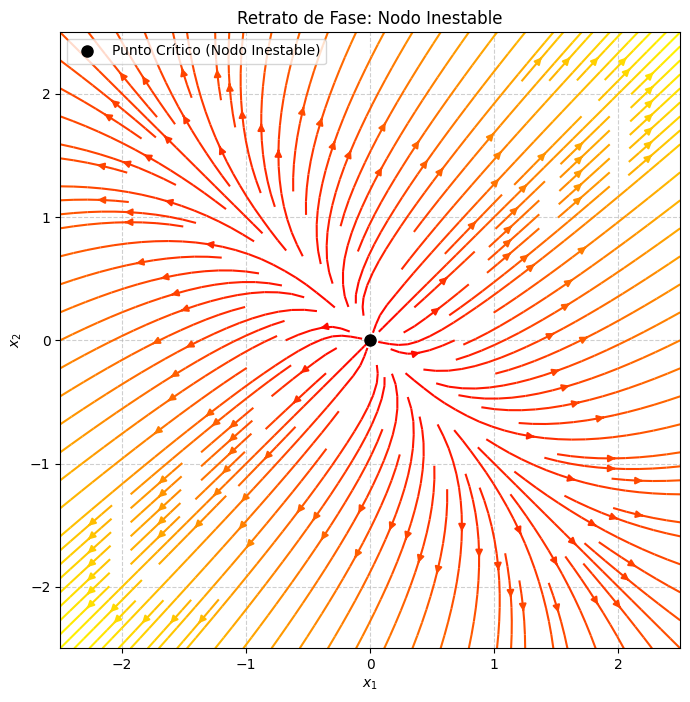

In [2]:
# Importación de librerías para la visualización
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definición del Rango y la Malla ---
rango = 2.5
x_limit = np.linspace(-rango, rango, 20)
y_limit = np.linspace(-rango, rango, 20)
X_grid, Y_grid = np.meshgrid(x_limit, y_limit)

# --- 2. Definición de las EDO del Sistema (Campos Vectoriales) ---
# Sistema: x1' = 2*x1 + x2  (U)
#          x2' = x1 + 2*x2   (V)
U = 2 * X_grid + Y_grid
V = X_grid + 2 * Y_grid

# --- 3. Normalización y Gráfico ---
# Calculamos la magnitud (N) para controlar el tamaño de las flechas
N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N

plt.figure(figsize=(8, 8))
# Dibuja el flujo, el color representa la magnitud (crecimiento)
plt.streamplot(X_grid, Y_grid, U_norm, V_norm, density=1.5, linewidth=1.5, color=N, cmap='autumn')

# Dibuja el punto crítico (0, 0)
plt.plot(0, 0, 'ko', markersize=8, label='Punto Crítico (Nodo Inestable)')

# Títulos y Etiquetas
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Retrato de Fase: Nodo Inestable')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## 🌟 Conclusión y Lectura del Retrato de Fase

El Retrato de Fase **confirma la inestabilidad** determinada por los autovalores positivos:

* **Comportamiento:** Las líneas de flujo (trayectorias) se **alejan del origen (0, 0)** en todas direcciones a medida que $t$ aumenta.
* **Significado Físico:** Si este sistema modelara una situación física (ej. poblaciones o circuitos), cualquier pequeña perturbación alejaría al sistema del estado de equilibrio, provocando un crecimiento ilimitado o un colapso.

Este análisis visual es crucial para el **Nivel 3** del curso, permitiendo tomar decisiones o predecir el comportamiento a largo plazo de un sistema dinámico.